In this notebook we begin writing code for finding the melancholia state.

In [1]:
import numpy as np
import sys
sys.path.append('/Users/cfn18/Desktop/Double-Well-SR/Deterministic-Model')
from fancyWell import *
import matplotlib.pyplot as plt

In [2]:
# Writing Class for M State Algoirtimg

def bisect(x, y):
    return x + 0.5 * (y - x)

def check_cold(ic, integrator): # M State class needs such a function for initialisation
    """
    Checks whether a given ic ends up at the cold point.
    """
    
    integrator.state = ic
    tau = 0.1 # How long we integrate between checks, will effect how efficient we are
    
    for i in range(1000): # How many checks we make
        integrator.integrate(tau)
        if integrator.state[0] < -0.5: #Threshold for being cold #ENSURE YOUR COLD IC MATCHES THE TRUE statement
            return True
        elif integrator.state[0] > 0.5: #Threshold for being hot
            return False  
    return None

class MStateAlgorithm:
    
    def __init__(self, integrator, check_cold, tau, ic):
        
        self.integrator = integrator
        self.check_cold = check_cold
        self.cold_point, self.hot_point = ic
        self.cold_ts=[self.cold_point]
        self.hot_ts=[self.hot_point]


        
    def _midpoint_update(self):
        
        # Find midpoint
        midpoint = bisect(self.cold_point, self.hot_point)

        # Check if it the midpoint is cold or hot
        midpoint_cold = self.check_cold(midpoint, self.integrator)

        # Update cold or hot point depending on result
        if midpoint_cold:
            self.cold_point = midpoint
        elif not midpoint_cold:
            self.hot_point = midpoint
        elif mid_point_cold is None: # check_cold didn't know
            self.cold_point = midpoint
                
    def _step(self):
        
        # Integate cold and hot points one step forward
        self.integrator.state = self.cold_point
        self.integrator.integrate(tau)
        self.cold_point = self.integrator.state
    
        self.integrator.state = self.hot_point
        self.integrator.integrate(tau)
        self.hot_point = integrator.state
        
        # Midpoint update
        self._midpoint_update()
    
    def run(self, steps, timer=False):
        for i in tqdm(range(steps), disable=timer):
            self._step()
            
            #UPDATE TO USE AN OBSEVERVER CLASS RATHER THAN THIS
            self.hot_ts.append(self.hot_point)
            self.cold_ts.append(self.cold_point)


            
# class MStateObserver:
    
#     def __init__(self, MStateAlgorithm):
#         self.alg = MStateAlgorithm
        
#     def 
        

In [3]:
tau = 0.1
alpha = 0.0
cold_init = np.array([-3, 0.9])
hot_init = np.array([20, 0.2])

integrator = FancyWellIntegrator(alpha)
mstate = MStateAlgorithm(integrator, check_cold, tau, [cold_init, hot_init])

In [4]:
mstate.run(10)

  0%|          | 0/10 [00:00<?, ?it/s]

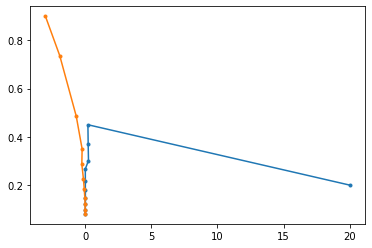

In [5]:
plt.plot(np.vstack(mstate.hot_ts)[:, 0], np.vstack(mstate.hot_ts)[:, 1],'.-')
plt.plot(np.vstack(mstate.cold_ts)[:, 0], np.vstack(mstate.cold_ts)[:, 1],'.-')